# **CLASSIFICAÇÃO DE PRODUTOS DE UM E-COMMERCE POR CATEGORIA**


**OBJETIVO:**  


1. Utilizar etapas do método CRISP
2. Realizar pré-processamento de todas as features do Dataset fornecido
3. Desenvolver uma solução de machine learning que traga valor o cliente;
4. Criar um algoritmo capaz de classificar os produtos em diferentes categorias, baseado em dados descritivos de produtos digitais (no caso 5 categorias).

---


**DATASET USADO:** products_dataset.csv

# INSTALANDO REQUIREMENTS
---

In [1]:
#!pip install -r "C:\Projeto_Final_MineracaoDados\requirements.txt"

# BIBLIOTECAS A SEREM INSTALADAS
---

In [2]:
!pip install unidecode

# AQUISIÇÃO DOS DADOS
---

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"\Users\Rodrigo Mendes\Desktop\products_dataset.csv")

# EXPLORAÇÃO DOS DADOS
---

In [5]:
df.head()

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38507 entries, 0 to 38506
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38507 non-null  int64  
 1   seller_id          38507 non-null  int64  
 2   query              38507 non-null  object 
 3   search_page        38507 non-null  int64  
 4   position           38507 non-null  int64  
 5   title              38507 non-null  object 
 6   concatenated_tags  38505 non-null  object 
 7   creation_date      38507 non-null  object 
 8   price              38507 non-null  float64
 9   weight             38449 non-null  float64
 10  express_delivery   38507 non-null  int64  
 11  minimum_quantity   38507 non-null  int64  
 12  view_counts        38507 non-null  int64  
 13  order_counts       18117 non-null  float64
 14  category           38507 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.4+ MB


In [7]:
df.category.unique()

array(['Decoração', 'Papel e Cia', 'Outros', 'Bebê', 'Lembrancinhas',
       'Bijuterias e Jóias'], dtype=object)

In [8]:
df.shape

(38507, 15)

In [9]:
#PRÉ-PROCESSAMENTO DOS DADOS
---

SyntaxError: invalid syntax (<ipython-input-9-fad4fb920e28>, line 2)

## Transformar letras em minúsculas

In [10]:
df['query'] = df['query'].str.lower()
df['title'] = df['title'].str.lower()
df['concatenated_tags'] = df['concatenated_tags'].str.lower()

## Remoção de Acentos

In [11]:
import unidecode

df['title'] = df['title'].apply(lambda x: unidecode.unidecode(x))
df['query'] = df['query'].apply(lambda x: unidecode.unidecode(x))
df['concatenated_tags'] = df['concatenated_tags'].apply(lambda x: unidecode.unidecode(str(x)))

## Remoção de Símbolos

In [12]:
import re
#'s	(	)	,	?	[	]
df['title'] = df['title'].apply(lambda x: re.sub('\|\?|\.|\!|\/|\;|\:|\+|\-|\'|\(|\)|\,|\[|\]|\?|\_', '', x))
df['query'] = df['query'].apply(lambda x: re.sub('\|\?|\.|\!|\/|\;|\:|\+|\-|\'|\(|\)|\,|\[|\]|\?|\_', '', x))
df['concatenated_tags'] = df['concatenated_tags'].apply(lambda x: re.sub('\|\?|\.|\!|\/|\;|\:|\+|\-|\'|\(|\)|\,|\[|\]|\?|\_', '', str(x)))

## Remoção de Números

In [13]:
df['title'] = df['title'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df['query'] = df['query'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df['concatenated_tags'] = df['concatenated_tags'].apply(lambda x: re.sub(r'[0-9]+', '', str(x)))

## Remoção palavras de ligação (Stopwords)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Rodrigo
[nltk_data]     Mendes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rodrigo
[nltk_data]     Mendes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def RemovePalavrasLigacao (texto):

  """Esta função realiza a remoção das palavras de ligação (Stopwords) de Texto (String)"""

  palavras_ligacao = set(stopwords.words('portuguese'))   
  texto_tokenizado = word_tokenize(texto) 
    
  texto_filtrado = [w for w in texto_tokenizado if not w in palavras_ligacao]   
  texto_filtrado = [] 
    
  for w in texto_tokenizado: 
      if w not in palavras_ligacao: 
          texto_filtrado.append(w) 
          
  return texto_filtrado

In [16]:
df['title'] = df['title'].apply(lambda x: RemovePalavrasLigacao(x))
df['query'] = df['query'].apply(lambda x: RemovePalavrasLigacao(x))
df['concatenated_tags'] = df['concatenated_tags'].apply(lambda x: RemovePalavrasLigacao(str(x)))

Salvando coluna de 'concatenated_tags' para uso posterior

In [17]:
col_concat = df['concatenated_tags'].copy()

##Juntando Palavras Processadas

In [18]:
df['title'] = df['title'].apply(lambda x: " ".join(x))
df['query'] = df['query'].apply(lambda x: " ".join(x))
df['concatenated_tags'] = df['concatenated_tags'].apply(lambda x: " ".join(x))

## Testando similaridades entre as strings das Colunas

In [19]:
from difflib import SequenceMatcher

In [20]:
def sml(x,y):
    return SequenceMatcher(None, x, y).ratio()

### Similaridade entre 'title' e 'query'

In [21]:
import numpy as np

In [22]:
lista_comparacao = np.array([])

for i in range(0,len(df.title)):
  a = sml(df['title'][i], df['query'][i])
  lista_comparacao = np.append(lista_comparacao,a)
df['sim_title_query'] = lista_comparacao

### Similaridade entre 'title' e 'concatenated_tags'

In [23]:
lista_comparacao = np.array([])

for i in range(0,len(df.title)):
  a = sml(df['title'][i], df['concatenated_tags'][i])
  lista_comparacao = np.append(lista_comparacao,a)
df['sim_title_concat'] = lista_comparacao

### Similaridade entre 'query' e 'concatenated_tags'

In [24]:
lista_comparacao = np.array([])

for i in range(0,len(df.title)):
  a = sml(df['query'][i], df['concatenated_tags'][i])
  lista_comparacao = np.append(lista_comparacao,a)
df['sim_query_concat'] = lista_comparacao

## Criando linhas a partir dos itens da coluna 'concatenated_tags'

In [25]:
df['concatenated_tags'] = col_concat

In [26]:
df = df.explode('concatenated_tags').reset_index().drop('index', axis=1)

## Transformando creation_date em Date Time e usando apenas ano

In [27]:
df['creation_year'] = df['creation_date'].str[:4]

## Correlação entre as colunas

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,sim_title_query,sim_title_concat,sim_query_concat
product_id,1.00,-0.01,-0.00,-0.00,0.00,-0.01,0.00,0.01,0.02,0.04,-0.01,-0.04,-0.03
seller_id,-0.01,1.00,-0.02,-0.02,-0.00,0.01,-0.01,0.01,0.03,0.05,0.00,0.01,0.03
search_page,-0.00,-0.02,1.00,0.07,0.00,-0.03,0.03,0.05,-0.03,-0.02,-0.10,0.01,-0.03
position,-0.00,-0.02,0.07,1.00,0.01,-0.01,-0.00,0.01,-0.07,-0.07,-0.13,0.04,0.02
price,0.00,-0.00,0.00,0.01,1.00,0.24,-0.04,-0.11,-0.02,-0.05,-0.02,0.03,0.04
weight,-0.01,0.01,-0.03,-0.01,0.24,1.00,-0.04,-0.05,0.02,0.02,-0.05,-0.02,-0.01
express_delivery,0.00,-0.01,0.03,-0.00,-0.04,-0.04,1.00,0.10,-0.08,-0.08,0.07,0.00,0.00
minimum_quantity,0.01,0.01,0.05,0.01,-0.11,-0.05,0.10,1.00,0.03,0.04,-0.01,-0.06,-0.05
view_counts,0.02,0.03,-0.03,-0.07,-0.02,0.02,-0.08,0.03,1.00,0.67,-0.03,-0.32,-0.28
order_counts,0.04,0.05,-0.02,-0.07,-0.05,0.02,-0.08,0.04,0.67,1.00,-0.06,-0.32,-0.30


## Excluindo de colunas

In [29]:
df.drop(['query','title','creation_date'], axis=1, inplace=True)

## Preenchendo valores NaN  ""

In [30]:
df.fillna(0,inplace = True)

## Transformando colunas "concatenated_tags" e "creation_year" de object para string

In [31]:
df['concatenated_tags'] = df['concatenated_tags'].astype('str')
df['creation_year'] = df['creation_year'].astype('int')

## Selecionando dados inferiores a 2015

In [32]:
df2 = df.copy()
df2 = df2[df2['creation_year']<2015]

In [33]:
df2['creation_year'] = df2['creation_year'].astype('str')

## One Hot Encoding (Get Dummies)

In [34]:
col_dummies = ["concatenated_tags","creation_year"]

In [35]:
df2 = pd.get_dummies(df2, columns=col_dummies)  

## Separando dados de treino e teste

In [36]:
from sklearn.model_selection import train_test_split

label = df2["category"]
feat_cols = df2.columns.tolist()
feat_cols.remove("category")
feat = df2[feat_cols]

X_train, X_test, y_train, y_test = train_test_split(feat, label, random_state=1)

## Normalizando dados

In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_ = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Balanceando os dados

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_, y_ = sm.fit_resample(X_, y_train)

# MODELAGEM [XGBOOST]
---

## Criação do Modelo

In [39]:
import xgboost as xgb

clf_XGB = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=15,
    scale_pos_weight=100_000,
    use_label_encoder=True
)
clf_XGB.fit(X_, y_)

C:\Users\Rodrigo Mendes\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=100000, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Validação do Modelo

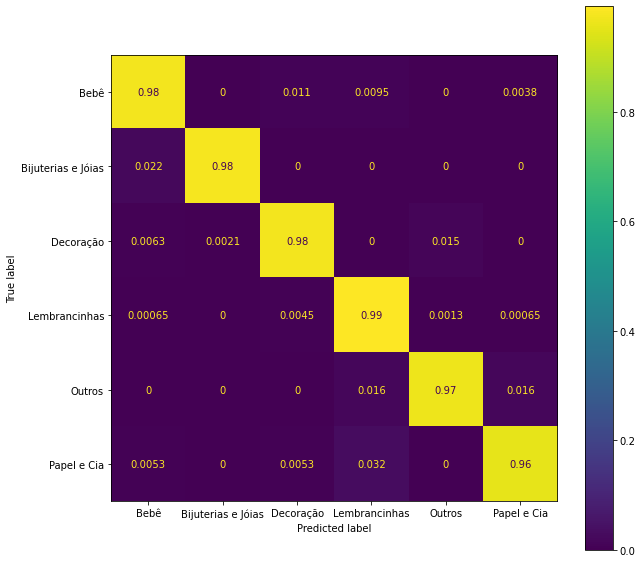

In [40]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_XGB, X_test, y_test, normalize="true", ax=ax)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf_XGB.predict(X_test)
print("Report do Classificador Xgboost:\n")
print(classification_report(y_true = y_test,y_pred = y_pred,digits = 4))

Report do Classificador Xgboost:

                    precision    recall  f1-score   support

              Bebê     0.9884    0.9753    0.9818       526
Bijuterias e Jóias     0.9783    0.9783    0.9783        46
         Decoração     0.9707    0.9768    0.9738       475
     Lembrancinhas     0.9916    0.9929    0.9923      1549
            Outros     0.9291    0.9672    0.9478       122
       Papel e Cia     0.9731    0.9577    0.9653       189

          accuracy                         0.9835      2907
         macro avg     0.9719    0.9747    0.9732      2907
      weighted avg     0.9836    0.9835    0.9835      2907



# MODELAGEM [DECISION TREE]
---

## Criação do Modelo

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf_DTR = DecisionTreeClassifier()
clf_DTR.fit(X_,y_)

DecisionTreeClassifier()

## Validação do Modelo

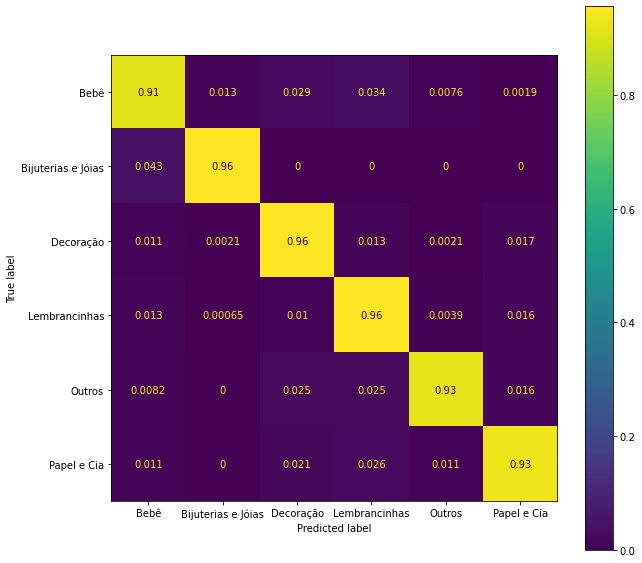

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_DTR, X_test, y_test, normalize="true", ax=ax)

In [46]:
y_pred = clf_DTR.predict(X_test)
print("Report do Classificador Decision Tree:\n")
print(classification_report(y_true = y_test,y_pred = y_pred,digits = 4))

Report do Classificador Decision Tree:

                    precision    recall  f1-score   support

              Bebê     0.9413    0.9144    0.9277       526
Bijuterias e Jóias     0.8302    0.9565    0.8889        46
         Decoração     0.9228    0.9558    0.9390       475
     Lembrancinhas     0.9788    0.9561    0.9673      1549
            Outros     0.8968    0.9262    0.9113       122
       Papel e Cia     0.8302    0.9312    0.8778       189

          accuracy                         0.9456      2907
         macro avg     0.9000    0.9401    0.9187      2907
      weighted avg     0.9474    0.9456    0.9461      2907



#MODELAGEM [RANDOM FOREST]
---

## Criação do Modelo

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf_RFC = RandomForestClassifier()
clf_RFC.fit(X_,y_)

RandomForestClassifier()

## Validação do Modelo

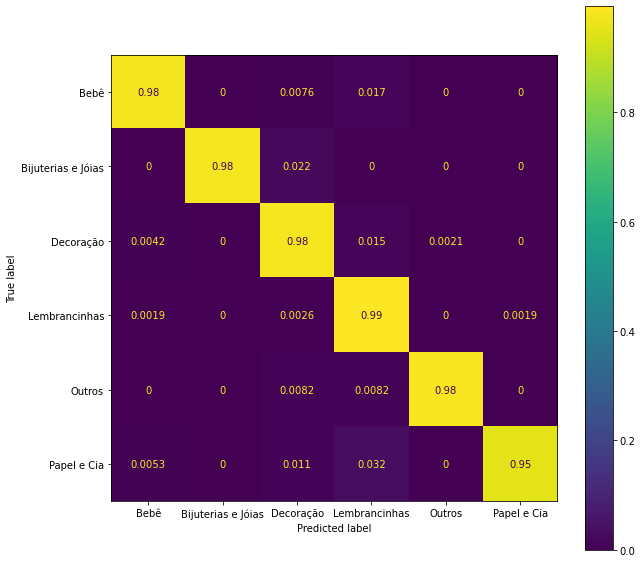

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_RFC, X_test, y_test, normalize="true", ax=ax)

In [49]:
y_pred = clf_RFC.predict(X_test)
print("Report do Classificador Random Forest:\n")
print(classification_report(y_true = y_test,y_pred = y_pred,digits = 4))

Report do Classificador Random Forest:

                    precision    recall  f1-score   support

              Bebê     0.9884    0.9753    0.9818       526
Bijuterias e Jóias     1.0000    0.9783    0.9890        46
         Decoração     0.9748    0.9789    0.9769       475
     Lembrancinhas     0.9853    0.9935    0.9894      1549
            Outros     0.9917    0.9836    0.9877       122
       Papel e Cia     0.9836    0.9524    0.9677       189

          accuracy                         0.9845      2907
         macro avg     0.9873    0.9770    0.9821      2907
      weighted avg     0.9845    0.9845    0.9845      2907



#MODELAGEM [SVM]
---

## Criação do Modelo

In [50]:
from sklearn.svm import SVC 

clf_SVM = SVC()
clf_SVM.fit(X_,y_)

SVC()

## Validação do Modelo

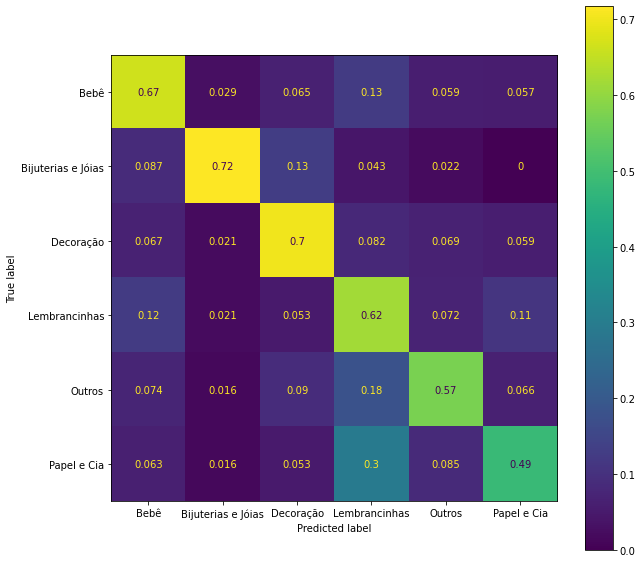

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_SVM, X_test, y_test, normalize="true", ax=ax)

In [52]:
y_pred = clf_SVM.predict(X_test)
print("Report do Classificador SVM:\n")
print(classification_report(y_true = y_test,y_pred = y_pred,digits = 4))

Report do Classificador SVM:

                    precision    recall  f1-score   support

              Bebê     0.5843    0.6654    0.6222       526
Bijuterias e Jóias     0.3474    0.7174    0.4681        46
         Decoração     0.6996    0.7011    0.7003       475
     Lembrancinhas     0.8381    0.6185    0.7117      1549
            Outros     0.2662    0.5738    0.3636       122
       Papel e Cia     0.2779    0.4868    0.3538       189

          accuracy                         0.6316      2907
         macro avg     0.5023    0.6271    0.5366      2907
      weighted avg     0.7014    0.6316    0.6519      2907



# MODELAGEM [LOGISTIC REGRESSION]
---

## Criação do Modelo

In [53]:
from sklearn.linear_model import LogisticRegression

clf_RLG = LogisticRegression()  
clf_RLG.fit(X_,y_) 

C:\Users\Rodrigo Mendes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Validação do Modelo

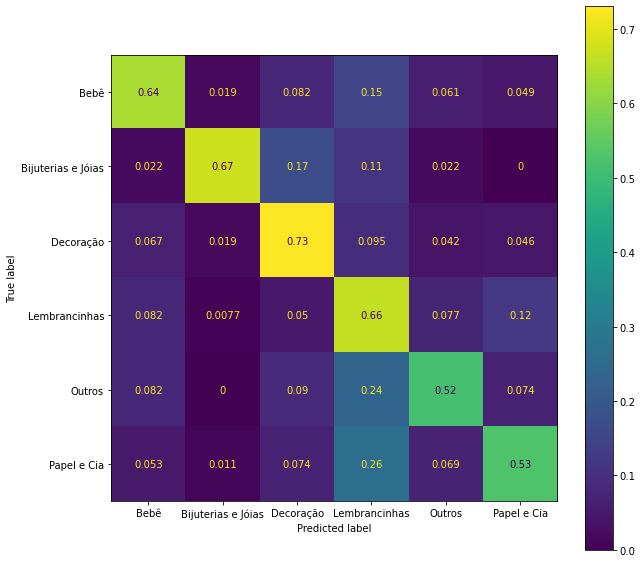

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_RLG, X_test, y_test, normalize="true", ax=ax)

In [55]:
y_pred = clf_RLG.predict(X_test)
print("Report do Classificador Regressão Logística Múltipla:\n")
print(classification_report(y_true = y_test,y_pred = y_pred,digits = 4))

Report do Classificador Regressão Logística Múltipla:

                    precision    recall  f1-score   support

              Bebê     0.6505    0.6369    0.6436       526
Bijuterias e Jóias     0.4844    0.6739    0.5636        46
         Decoração     0.6940    0.7305    0.7118       475
     Lembrancinhas     0.8310    0.6637    0.7380      1549
            Outros     0.2540    0.5164    0.3405       122
       Papel e Cia     0.2915    0.5291    0.3759       189

          accuracy                         0.6550      2907
         macro avg     0.5342    0.6251    0.5622      2907
      weighted avg     0.7112    0.6550    0.6736      2907



#ATUALIZAÇÃO DE REQUIREMENTS
---

In [56]:
#!python --version

In [57]:
#!pip freeze > "C:\Projeto_Final_MineracaoDados\requirements.txt"